# Tutorial 2 - Covariance and Principle Components

In this tutorial we will get some experience with estimating the covariance matrix and finding principle components of some data. You will also get some experience manipulating matrices in python.

An estimator for the covariance matrix between variables $x$ and $y$ is
\begin{align}
{\hat{C}}_{xy} = \frac{1}{N-1} \sum_{i=1}^N \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align}



You will need to import numpy, matplotlib.pyplot and pandas


1) Read file homework_01_2d-datafile.csv into a dataframe using pandas

Make a scatter plot of X vs Y.
 

Text(0, 0.5, 'Y')

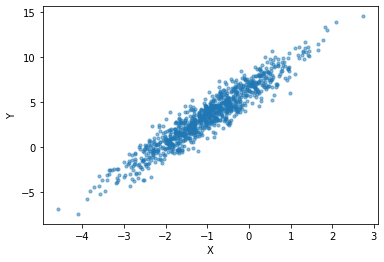

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('/home/richard/statistics_for_astrophysics/homework_01_2d-datafile.csv')

_1=plt.scatter(data.X, data.Y,alpha=0.5, s=10)
plt.xlabel('X')
plt.ylabel('Y')

 2) Find the covariance matrix for the two variables.  Don't use the 
 function numpy.cov(), write your own function this first time.   



In [3]:
# Print the covariance matrix C for X and Y.

# Do X and Y appear to be correlated?

# What is the variance of X?

# What is the variance of Y?

#definition of home-made covariance matrix function
def cov(ma=np.mat([])):
    n_variable=np.shape(ma)[0]
    n_observations=np.shape(ma)[1]
    print("Variable:", n_variable)
    print("observations", n_observations)
    mean_ma=np.mean(ma,axis=1)
    mean_sub=ma-mean_ma
    co=np.matmul(mean_sub,mean_sub.T)/(mean_sub.shape[1]-1)    
    return (co)

#definition of normalized covariance coefficient function
def rho(mat=np.mat([])):
    dia_sqrt=np.sqrt(np.diagonal(mat))
    rho=(mat/np.outer(dia_sqrt, dia_sqrt))
    return (rho)    

a1=np.mat([data.X, data.Y])
print(np.shape(a1))
C=cov(a1)
print('-------------')
print("home-made cov func: \n", C)
C_np=np.cov(a1)
print("np.cov: \n", C_np)

print("-------------")
if C[1,0].any() > 0:
    print ("they appear to be correlated")
elif C[1,0].any() < 0:
    print ('They appear to be anti-correlated')
else: print ("sad news: they looks not correlated")

print("-------------")
print("the variance of X:", C[0,0])
print('the variance of Y:', C[1,1])

(2, 1000)
Variable: 2
observations 1000
-------------
home-made cov func: 
 [[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]
np.cov: 
 [[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]
-------------
they appear to be correlated
-------------
the variance of X: 1.0499162157866184
the variance of Y: 10.442324810888485


3) Find the percision matrix and print it.

In [4]:
C_inv=np.linalg.inv(C)
print(C_inv)

#normalized covariance coefficient
print(rho(C))

[[ 9.6644879  -2.90956357]
 [-2.90956357  0.97170915]]
[[1.         0.94944603]
 [0.94944603 1.        ]]


The normalized covariance coefficients are
\begin{align}
\rho_{ij} = \frac{\hat{C}_{ij} }{\sqrt{\hat{C}_{ii} \hat{C}_{jj} }}
\end{align}

If the off-diagonal components of this matrix are measures of correlations.

 4) Consider the following code:
 
    D = np.diag(C)
    
    print D
    
    M =  np.outer(D,D)
    
    print M

 Use it to efficiently calculate the normalized covariance matrix and print it.


In [70]:
# Is the normalized covariance matrix rho?
# I think so.

 5) Decompose the covariance (not normalized) matrix using 
    an eigenvalue decompositions.
    
    Use w,v = numpy.linalg.eig() to find the decomposition.

In [10]:
# What are the principle components (eigenvectors) of the data? 
# What are the eigenvalues?
w,v=np.linalg.eig(C)
print('eigenvalues:', w)
print('eigenvector:', v)

eigenvalues: [ 0.09480059 11.39744044]
eigenvector: [[-0.95681567 -0.29069531]
 [ 0.29069531 -0.95681567]]


 6) Transform the data into the basis of the principle components (or eigenvectors) that were found in 5).

  You can collect the data into a structure data = np.array([X,Y]) and then matrix 
  multiply it by a matrix with @ (or np.dot(,) ). You might need to transpose something...
  
numpy.shape() is useful to make sure your doing matrix multiplications correctly.





[[ 2.07456259  1.75813548  1.74019878 ...  2.12021423  1.77692586
   1.70442506]
 [-7.98872698 -3.65003428 -5.88453648 ... -4.20495083 -1.23210847
   1.88253894]]


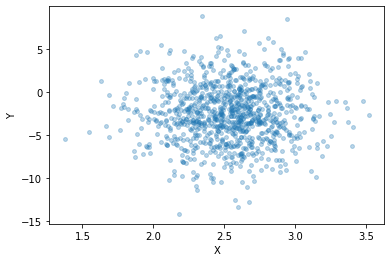

Variable: 2
observations 1000
[[ 9.48005856e-02 -5.20993547e-16]
 [-5.20993547e-16  1.13974404e+01]]
[[ 9.48005856e-02 -5.20993547e-16]
 [-5.20993547e-16  1.13974404e+01]]


In [21]:
#a1_b=np.dot(v.T, a1)
#a1_b=np.dot(a1_b, v)
a1_b=np.linalg.inv(v).dot(a1)
print(a1_b)
#make a scatter plot of the data in this basis
_2=plt.scatter(np.array(a1_b[0])-np.mean(a1_b),np.array(a1_b[1]-np.mean(a1_b)), s=15, alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#print the covariance matrix of the data in this basis
cov_a1_b=cov(a1_b)
print(np.cov(a1_b))
print(cov_a1_b)

Compare the diagonal elements (variances) of the covariance matrix 
to the eigenvalues you got in part 4).  Are the variances of the principle components larger, smaller or both 
larger and smaller than the original variances?

In [22]:
print(np.diagonal(C))
print(np.diag(cov_a1_b))
print("variance[1] is larger and the other is maller")

[ 1.04991622 10.44232481]
[ 0.09480059 11.39744044]
variance[1] is larger and the other is maller


 7) Do 1) through 6), but using the data file homework_01_5d-datafile.csv this time.
    In this case the data is 5 dimensional.  You can use numpy.cov() this time.
    You can't plot all those dimensions so you don't have to do the scatter plots
    ,but feel free to plot some dimensions to make sure you are getting what 
    you expect.

 The best way to find the covariance matrix is to make a 5 by 2000 array out 
 of the columns of the dataframe using numpy.array([...])

In [23]:
data_2=pd.read_csv('./homework_01_5d-datafile.csv', usecols=['X1','X2','X3','X4','X5'])
ma_2=np.mat([data_2.X1, data_2.X2, data_2.X3, data_2.X4, data_2.X5])
print(np.shape(ma_2))
cov_2=np.cov(ma_2)
print(cov_2)

(5, 2000)
[[ 0.9528516   2.88094852 -0.06656913  0.01808025 -0.04847952]
 [ 2.88094852  9.70755876 -0.24361655  0.08729034 -0.12363643]
 [-0.06656913 -0.24361655  2.89654169  0.0719737  -0.02949331]
 [ 0.01808025  0.08729034  0.0719737   3.45612595 -1.42338742]
 [-0.04847952 -0.12363643 -0.02949331 -1.42338742  2.44235468]]


In [29]:
#percision matrix
print("percision matrix:\n", np.linalg.inv(cov_2) )
print(np.shape(np.linalg.inv(cov_2)))
print('-----------------')
#normalized covariance coeifficient
print("normalized covariance coeifficient:\n", rho(cov_2))
print('-----------------')
w,v=np.linalg.eig(cov_2)
print('eigenvalues:\n', w)
print('eigenvector:\n', v)
print('-----------------')
a2_b=np.dot(v.T, ma_2)
print("data in egienvector basis:\n", a2_b)
print(np.diagonal(np.cov(a2_b)))
print('-----------------')
#Check the correlation
print("X1 and X2 appear to be correlated,\n X4 and X5 appear to be anti-correlated")

percision matrix:
 [[ 1.02343010e+01 -3.03725932e+00 -2.08350036e-02  5.76920722e-02
   8.27651130e-02]
 [-3.03725932e+00  1.00467656e+00  1.49406408e-02 -1.79032977e-02
  -1.96830235e-02]
 [-2.08350036e-02  1.49406408e-02  3.46202857e-01 -7.38844682e-03
   2.17487787e-04]
 [ 5.76920722e-02 -1.79032977e-02 -7.38844682e-03  3.81203820e-01
   2.22312590e-01]
 [ 8.27651130e-02 -1.96830235e-02  2.17487787e-04  2.22312590e-01
   5.39652263e-01]]
(5, 5)
-----------------
normalized covariance coeifficient:
 [[ 1.          0.94725706 -0.04007009  0.00996316 -0.03177908]
 [ 0.94725706  1.         -0.04594221  0.01507011 -0.02539143]
 [-0.04007009 -0.04594221  1.          0.02274779 -0.01108866]
 [ 0.00996316  0.01507011  0.02274779  1.         -0.48991865]
 [-0.03177908 -0.02539143 -0.01108866 -0.48991865  1.        ]]
-----------------
eigenvalues:
 [10.58269269  0.08972469  4.46082977  2.88428618  1.43789934]
eigenvector:
 [[ 0.28669901  0.95789543  0.00629311  0.01176483 -0.00787451]
 [ 0.9

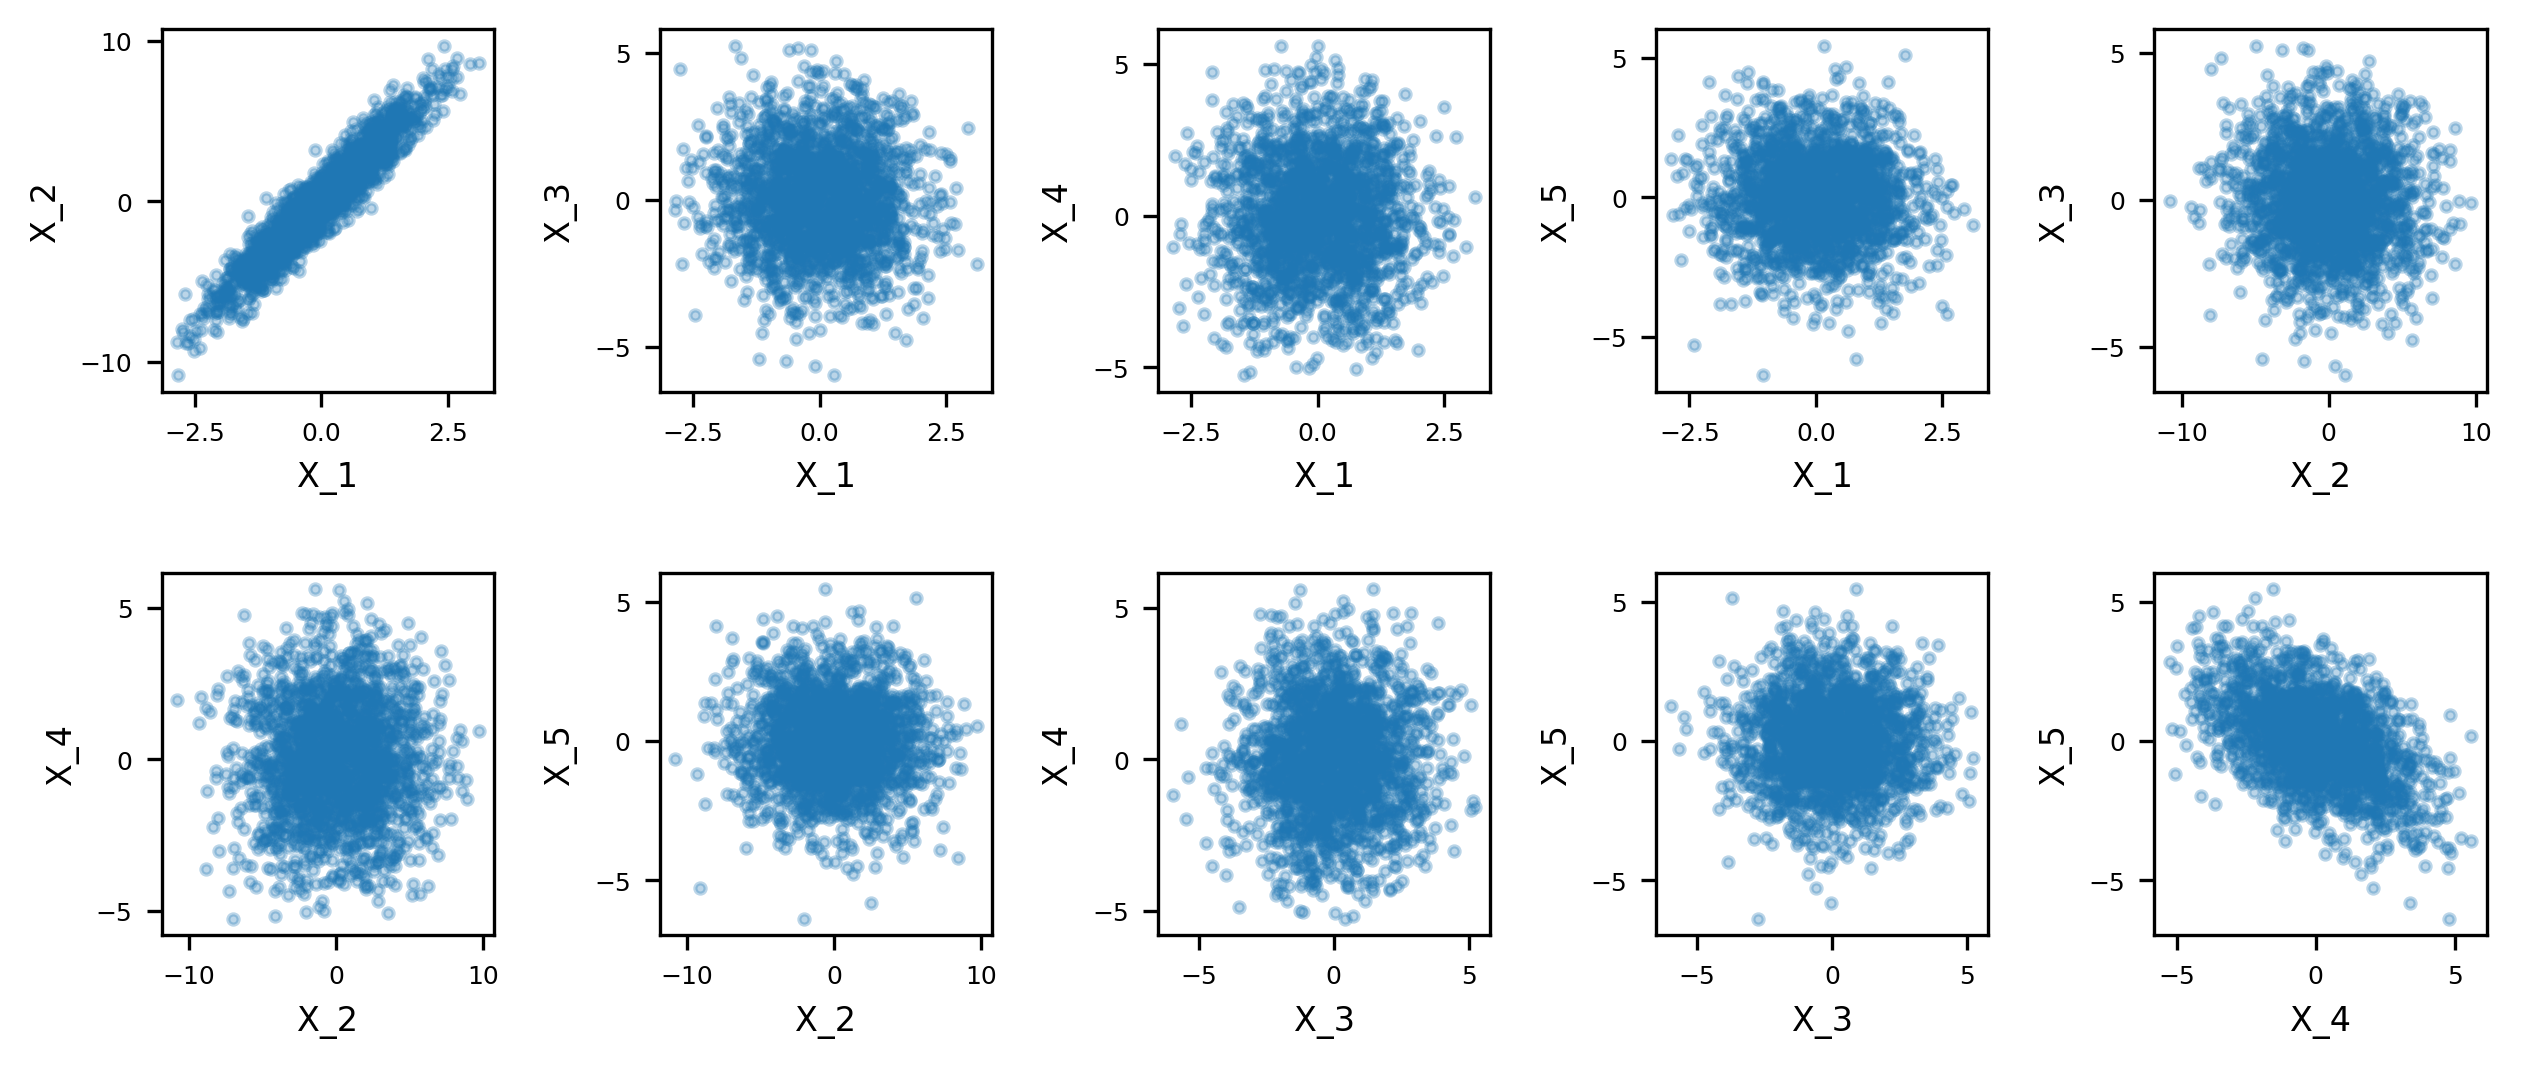

In [25]:
#make a scatter plot of the data in this basis
fig=plt.figure(figsize=(10,4),dpi=300)
m=1
for i in range(5):
    for j in range(i+1,5):
        if i != j:
            _2=plt.subplot(2,5,m)
            xx=np.array(ma_2[i])-np.mean(ma_2[i])
            yy=np.array(ma_2[j])-np.mean(ma_2[j])
            _2.scatter(xx, yy, s=6, alpha=0.3)
            plt.xlabel('X_%s'%(i+1), fontsize=8)
            plt.ylabel('X_%s'%(j+1), fontsize=8)
            plt.xticks(size=6)
            plt.yticks(size=6)
            plt.subplots_adjust(wspace=0.5, hspace=0.5)
            m+=1
plt.show()

In [26]:
print("Which variables seem to be correlated with each other and which ones not?")
print(rho(cov_2))
print("------------")
print("What are the principle components (eigenvectors) of the data?") 
print(v)
print("------------")
print('What are the variances along each principle component?')
print(np.diagonal(cov_2))

Which variables seem to be correlated with each other and which ones not?
[[ 1.          0.94725706 -0.04007009  0.00996316 -0.03177908]
 [ 0.94725706  1.         -0.04594221  0.01507011 -0.02539143]
 [-0.04007009 -0.04594221  1.          0.02274779 -0.01108866]
 [ 0.00996316  0.01507011  0.02274779  1.         -0.48991865]
 [-0.03177908 -0.02539143 -0.01108866 -0.48991865  1.        ]]
------------
What are the principle components (eigenvectors) of the data?
[[ 0.28669901  0.95789543  0.00629311  0.01176483 -0.00787451]
 [ 0.95714721 -0.28693517  0.02125897  0.03181633  0.0085558 ]
 [-0.03259894 -0.00224888 -0.05197465  0.99805472 -0.01084765]
 [ 0.01589801  0.00578074 -0.8162593  -0.03571115  0.57633264]
 [-0.01890645  0.00812902  0.57491552  0.03822052  0.81706047]]
------------
What are the variances along each principle component?
[0.9528516  9.70755876 2.89654169 3.45612595 2.44235468]
